In [1]:
import os 
os.chdir('/Users/marcs')

In [2]:
import matplotlib.pyplot as plt
from pickle_loader import pickle_loader
import datetime as dt
import pandas as pd

In [40]:
earnings_data = pickle_loader('/Users/marcs/OneDrive/Documents/stock_analysis2/earnings_us.pickle')

In [41]:
earnings_data

{'MMM':                            EPS Estimate  Reported EPS  Surprise(%)
 Earnings Date                                                     
 2024-10-22 09:00:00-04:00           NaN           NaN          NaN
 2024-07-23 09:00:00-04:00           NaN           NaN          NaN
 2024-04-23 09:00:00-04:00           NaN           NaN          NaN
 2024-01-22 09:00:00-05:00          2.12           NaN          NaN
 2023-10-24 02:00:00-04:00          2.34          2.68       0.1438
 2023-07-25 02:00:00-04:00          1.72          2.17       0.2616
 2023-04-25 02:00:00-04:00          1.58          1.97       0.2437
 2023-01-24 01:00:00-05:00          2.36          2.28      -0.0352
 2022-10-25 02:00:00-04:00          2.60          2.69       0.0344
 2022-07-26 02:00:00-04:00          2.42          2.48       0.0264
 2022-04-26 02:00:00-04:00          2.31          2.65       0.1470
 2022-01-25 01:00:00-05:00          2.01          2.31       0.1484,
 'AOS':                            EPS E

## Remove empty entries 

A few of the stock symbols I used to source the data were not valid. In this section I will remove the invalid symbols which have empty entries.

In [42]:
tickers = list(earnings_data.keys())

In [43]:
type(earnings_data['BG']) 

pandas.core.frame.DataFrame

In [44]:
empty_tickers = [ticker for ticker in tickers if earnings_data[ticker] is None]

In [45]:
empty_tickers

['BRK.B', 'BF.B', 'FOX', 'NWS']

In [46]:
for empty in empty_tickers:
    earnings_data.pop(empty, None)

In [47]:
tickers = list(earnings_data.keys())

## Variation in Earnings Dates 

Obserse the variaiton the last reported EPS 

Remove empty Reportes EPS

In [70]:
empty_EPS = [ticker for ticker in tickers if earnings_data[ticker]['Reported EPS'].first_valid_index() is None]

for empty in empty_EPS:
    earnings_data.pop(empty, None)

tickers = list(earnings_data.keys())


In [71]:
earnings_data['MMM']['Reported EPS'].first_valid_index().strftime('%d-%m-%Y')

'24-10-2023'

In [72]:
last_reported_EPS = [earnings_data[ticker]['Reported EPS'].first_valid_index().strftime('%d-%m-%Y') for ticker in tickers]

In [113]:
from collections import Counter


EPS_count = Counter(last_reported_EPS)
EPS_count 

Counter({'02-11-2023': 70,
         '26-10-2023': 66,
         '01-11-2023': 39,
         '24-10-2023': 36,
         '25-10-2023': 29,
         '31-10-2023': 27,
         '27-10-2023': 24,
         '07-11-2023': 21,
         '19-10-2023': 19,
         '18-10-2023': 16,
         '08-11-2023': 16,
         '03-11-2023': 11,
         '09-11-2023': 11,
         '30-10-2023': 10,
         '17-10-2023': 8,
         '20-10-2023': 6,
         '13-10-2023': 6,
         '15-11-2023': 5,
         '23-08-2023': 4,
         '16-11-2023': 4,
         '29-08-2023': 4,
         '31-08-2023': 4,
         '06-11-2023': 4,
         '12-10-2023': 4,
         '28-09-2023': 3,
         '23-10-2023': 3,
         '05-10-2023': 3,
         '24-08-2023': 3,
         '22-08-2023': 3,
         '14-09-2023': 2,
         '02-08-2023': 2,
         '26-09-2023': 2,
         '30-08-2023': 2,
         '21-09-2023': 2,
         '20-09-2023': 2,
         '13-11-2023': 2,
         '27-09-2023': 2,
         '19-07-2023': 1

In [114]:
# Sort EPS count by date
import datetime
from operator import itemgetter

dates = list(EPS_count.keys())
dates = [datetime.datetime.strptime(date, "%d-%m-%Y") for date in dates]

count = list(EPS_count.values())

EPS_count = list(zip(dates, count))

EPS_count = sorted(EPS_count, key=itemgetter(0))

EPS_count = [(element[0].strftime("%d/%m/%Y"), element[1]) for element in EPS_count]

EPS_count

[('25/04/2023', 1),
 ('01/05/2023', 1),
 ('11/05/2023', 1),
 ('19/07/2023', 1),
 ('02/08/2023', 2),
 ('08/08/2023', 1),
 ('15/08/2023', 1),
 ('16/08/2023', 1),
 ('17/08/2023', 1),
 ('18/08/2023', 1),
 ('22/08/2023', 3),
 ('23/08/2023', 4),
 ('24/08/2023', 3),
 ('29/08/2023', 4),
 ('30/08/2023', 2),
 ('31/08/2023', 4),
 ('08/09/2023', 1),
 ('11/09/2023', 1),
 ('14/09/2023', 2),
 ('15/09/2023', 1),
 ('19/09/2023', 1),
 ('20/09/2023', 2),
 ('21/09/2023', 2),
 ('26/09/2023', 2),
 ('27/09/2023', 2),
 ('28/09/2023', 3),
 ('29/09/2023', 1),
 ('03/10/2023', 1),
 ('05/10/2023', 3),
 ('10/10/2023', 1),
 ('12/10/2023', 4),
 ('13/10/2023', 6),
 ('16/10/2023', 1),
 ('17/10/2023', 8),
 ('18/10/2023', 16),
 ('19/10/2023', 19),
 ('20/10/2023', 6),
 ('23/10/2023', 3),
 ('24/10/2023', 36),
 ('25/10/2023', 29),
 ('26/10/2023', 66),
 ('27/10/2023', 24),
 ('30/10/2023', 10),
 ('31/10/2023', 27),
 ('01/11/2023', 39),
 ('02/11/2023', 70),
 ('03/11/2023', 11),
 ('06/11/2023', 4),
 ('07/11/2023', 21),
 ('08/11

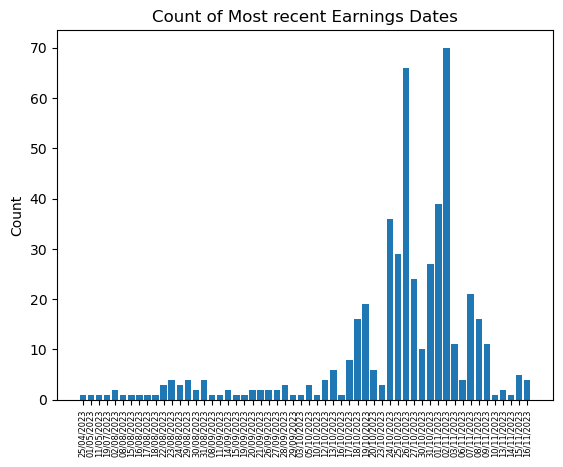

In [118]:
import matplotlib.pyplot as plt

dates = [element[0] for element in EPS_count]
count = [element[1] for element in EPS_count]

plt.bar(dates, count)


plt.ylabel('Count')
plt.title('Count of Most recent Earnings Dates')


plt.xticks(range(len(dates)), dates, rotation=90, fontsize = 6)
plt.show()

In [93]:
dates

['24-10-2023',
 '26-10-2023',
 '18-10-2023',
 '27-10-2023',
 '28-09-2023',
 '19-07-2023',
 '14-09-2023',
 '25-10-2023',
 '15-11-2023',
 '03-11-2023',
 '02-11-2023',
 '15-08-2023',
 '07-11-2023',
 '19-10-2023',
 '31-10-2023',
 '09-11-2023',
 '20-10-2023',
 '02-08-2023',
 '23-08-2023',
 '16-11-2023',
 '30-10-2023',
 '01-11-2023',
 '19-09-2023',
 '17-10-2023',
 '23-10-2023',
 '29-08-2023',
 '08-11-2023',
 '13-10-2023',
 '31-08-2023',
 '29-09-2023',
 '16-10-2023',
 '26-09-2023',
 '05-10-2023',
 '06-11-2023',
 '30-08-2023',
 '21-09-2023',
 '18-08-2023',
 '12-10-2023',
 '24-08-2023',
 '01-05-2023',
 '20-09-2023',
 '25-04-2023',
 '13-11-2023',
 '14-11-2023',
 '08-08-2023',
 '17-08-2023',
 '08-09-2023',
 '15-09-2023',
 '22-08-2023',
 '03-10-2023',
 '10-11-2023',
 '27-09-2023',
 '11-09-2023',
 '10-10-2023',
 '11-05-2023',
 '16-08-2023']